## wap - Descent area (wap500 < 0)

A_d - area of descent (wap500 > 0) <br/>

In [54]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy

from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [55]:
from myFuncs import *

### one dataset

In [56]:
variable = 'wap'

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no wap data
    # 'bcc-csm1-1',   # 4 no wao rcp
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 no wap data
    # 'HadGEM2-AO',   # 7 no wap data
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 no wap data
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13 no wap data
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 no wap data
    ]


observations = [
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:wap, dataset:GFDL-CM3, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (plev: 8, time: 10950, lat: 22, lon: 128)
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    wap      (time, plev, lat, lon) float32 ...

In [57]:
wap = ds[variable]
wap

<xarray.DataArray 'wap' (time: 10950, plev: 8, lat: 22, lon: 128)>
[246681600 values with dtype=float32]
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative
    units:          hPa day⁻¹

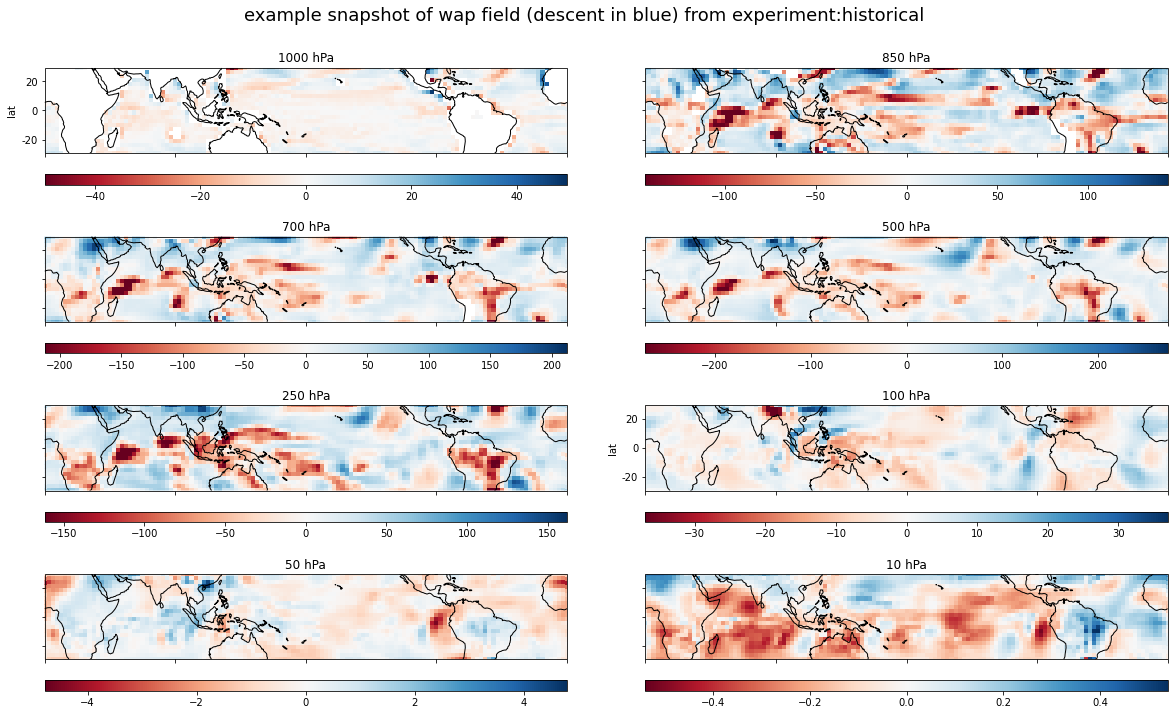

In [58]:
fig= plt.figure(figsize=(20,25))

title = 'example snapshot of {} field (descent in blue) from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.6)

for i, plev in enumerate(wap['plev']):
    ax= fig.add_subplot(4,2,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    scene = wap.isel(time=0)

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    vmax = scene.sel(plev=plev).max()
    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='RdBu', vmin=-vmax, vmax=vmax)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')

    if i>=20:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055)

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)
        


    if i== 0 or i==5 or i==10 or i==15 or i==20:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

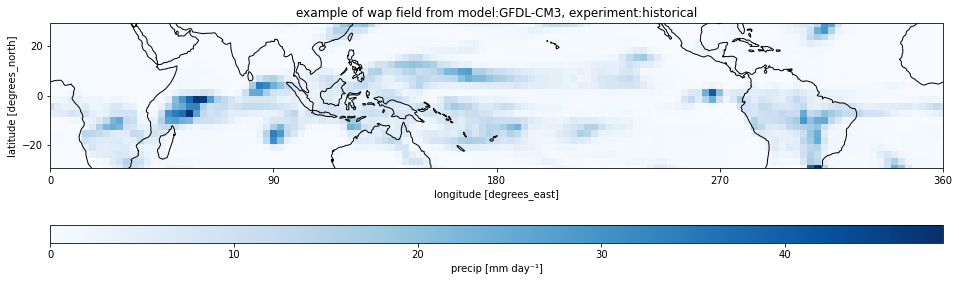

In [59]:
scene = get_dsvariable('precip', datasets[0], experiments[0], resolution=resolutions[0])['precip'].isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format(variable, datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

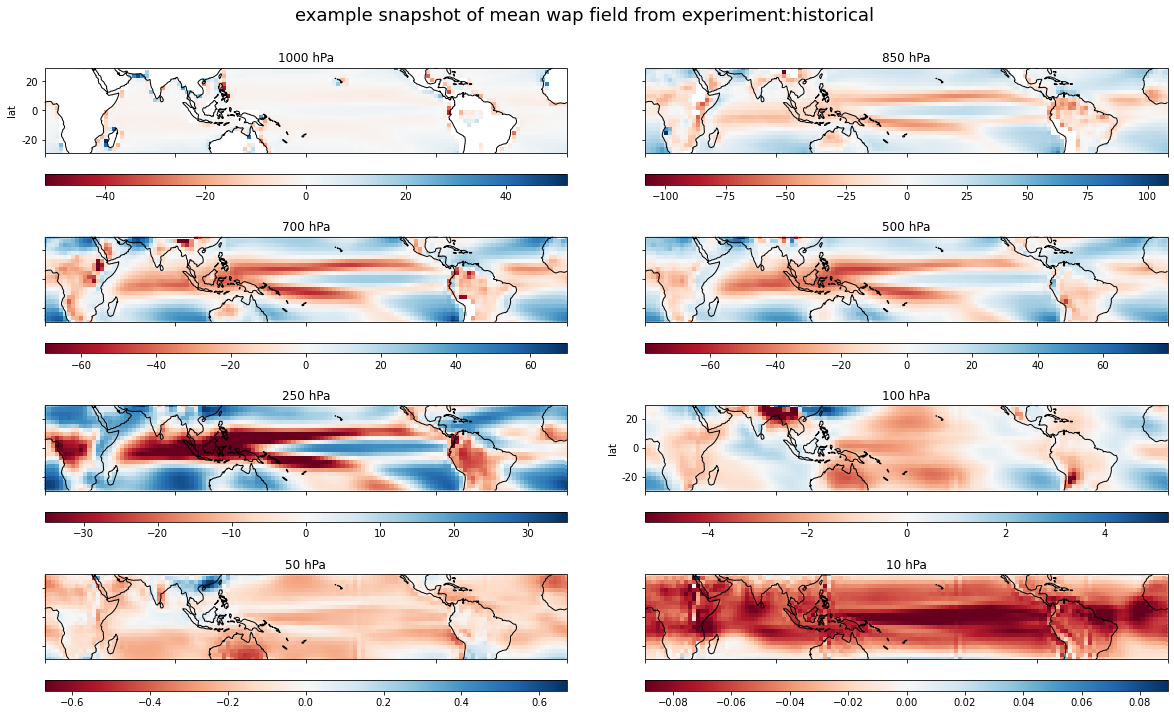

In [60]:
fig= plt.figure(figsize=(20,25))

title = 'example snapshot of mean {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.6)

for i, plev in enumerate(wap['plev']):
    ax= fig.add_subplot(4,2,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    scene = wap.mean(dim = 'time')

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    vmax = scene.sel(plev=plev).max()
    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='RdBu', vmin=-vmax, vmax=vmax)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')

    if i>=20:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055)

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)
        


    if i== 0 or i==5 or i==10 or i==15 or i==20:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

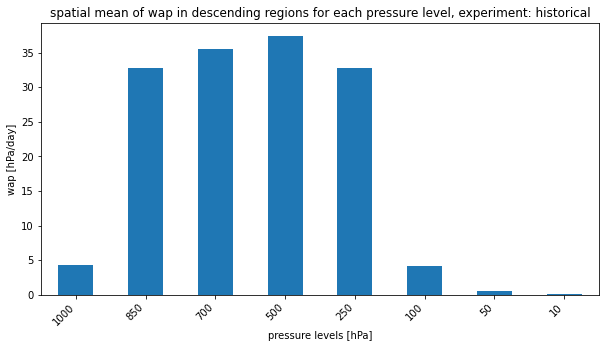

In [61]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(ds.lat))
wap_descent = wap.where(wap>0)
wap_descent.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.title('spatial mean of wap in descending regions for each pressure level, experiment: {}'.format(experiments[0]))
plt.ylabel('wap [{}]'.format('hPa/day'))
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((wap.plev.values/100).astype(int), rotation=45, ha='right')
plt.show()

In [62]:
wap['plev']

<xarray.DataArray 'plev' (plev: 8)>
array([100000.,  85000.,  70000.,  50000.,  25000.,  10000.,   5000.,   1000.])
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03

In [63]:
wap500 = wap.sel(plev = 5e4)
wap500

<xarray.DataArray 'wap' (time: 10950, lat: 22, lon: 128)>
array([[[ 82.64245 ,  94.72309 , ...,  50.584908,  69.95339 ],
        [ 44.676846,  55.900723, ...,  26.694828,  36.28282 ],
        ...,
        [ 62.898422,  12.94857 , ...,  82.68273 ,  88.04838 ],
        [100.102165,  74.66441 , ...,  98.34652 , 105.07749 ]],

       [[ 65.01517 , 111.40498 , ...,  22.180273,  38.05716 ],
        [ 30.310682,  64.24497 , ...,  13.188415,  20.897535],
        ...,
        [ 45.73755 ,  12.620049, ...,  76.98236 ,  66.087585],
        [ 83.76507 ,  64.830765, ..., 105.44487 ,  92.35695 ]],

       ...,

       [[134.5578  , 142.22446 , ..., 103.67217 , 120.66956 ],
        [110.147865, 117.38411 , ...,  87.8347  , 100.163635],
        ...,
        [ 56.88862 , 113.43284 , ...,  19.885422,  32.61963 ],
        [ 21.393564,  70.56167 , ..., -13.689754,  -2.716782]],

       [[ 66.56293 ,  75.87341 , ...,  81.4805  ,  67.68548 ],
        [ 61.03681 ,  68.58215 , ...,  62.50151 ,  58.098213],
        ...,
        [  1.859937,  16.027681, ...,  18.01736 ,  12.187251],
        [ -1.870907, -16.803032, ...,  71.112755,  28.610054]]], dtype=float32)
Coordinates:
    plev     float64 5e+04
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative
    units:          hPa day⁻¹

In [64]:
wap500_descent = wap500.where(wap500>0)
wap500_descent

<xarray.DataArray 'wap' (time: 10950, lat: 22, lon: 128)>
array([[[ 82.64245  ,  94.72309  , 103.67116  , ...,  21.897602 ,
          50.584908 ,  69.95339  ],
        [ 44.676846 ,  55.900723 ,  61.461876 , ...,   6.5634885,
          26.694828 ,  36.28282  ],
        [ 39.914013 ,  43.546577 ,  40.94709  , ...,  13.17441  ,
          26.301983 ,  32.534107 ],
        ...,
        [  7.2725654,         nan,         nan, ...,  44.668    ,
          59.684216 ,  52.359825 ],
        [ 62.898422 ,  12.94857  ,         nan, ...,  66.72257  ,
          82.68273  ,  88.04838  ],
        [100.102165 ,  74.66441  ,  37.317986 , ...,  93.63246  ,
          98.34652  , 105.07749  ]],

       [[ 65.01517  , 111.40498  , 144.95102  , ...,  10.345747 ,
          22.180273 ,  38.05716  ],
        [ 30.310682 ,  64.24497  , 105.51051  , ...,         nan,
          13.188415 ,  20.897535 ],
        [ 24.958458 ,  43.139183 ,  67.545906 , ...,   2.3803194,
          13.642286 ,  20.599644 ],
...
        [ 68.214485 , 117.21684  , 150.1108   , ...,   4.1472125,
          23.554386 ,  41.201134 ],
        [ 56.88862  , 113.43284  , 168.32005  , ...,   4.3111377,
          19.885422 ,  32.61963  ],
        [ 21.393564 ,  70.56167  , 126.94267  , ...,   1.0933708,
                 nan,         nan]],

       [[ 66.56293  ,  75.87341  ,  91.97244  , ...,  97.967384 ,
          81.4805   ,  67.68548  ],
        [ 61.03681  ,  68.58215  ,  73.8965   , ...,  71.256165 ,
          62.50151  ,  58.098213 ],
        [ 63.398403 ,  68.70831  ,  71.79003  , ...,  56.067146 ,
          58.09514  ,  59.712963 ],
        ...,
        [        nan,  19.471096 ,  40.74413  , ...,         nan,
                 nan,         nan],
        [  1.8599373,  16.027681 ,  37.250134 , ...,  12.634108 ,
          18.01736  ,  12.187251 ],
        [        nan,         nan,         nan, ..., 118.15189  ,
          71.112755 ,  28.610054 ]]], dtype=float32)
Coordinates:
    plev     float64 5e+04
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative
    units:          hPa day⁻¹

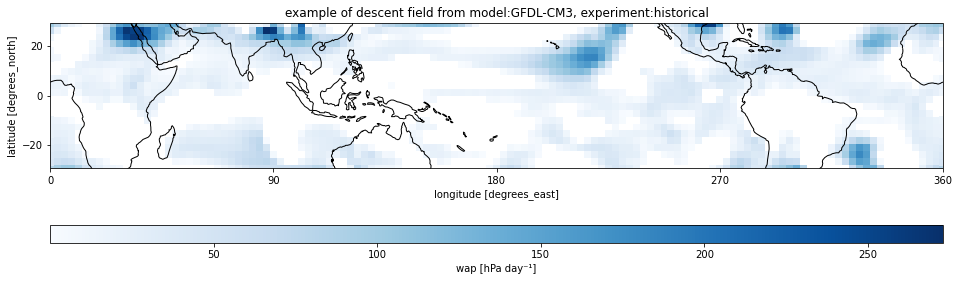

In [65]:
scene = wap500_descent.isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format('descent', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

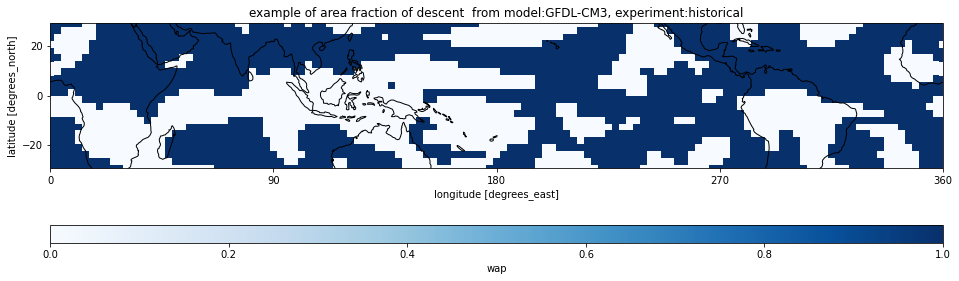

In [66]:
scene = wap500_descent.isel(time=0)>0
title = 'example of {} from model:{}, experiment:{}'.format('area fraction of descent ', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

In [67]:
lat = wap.lat.data
lon = wap.lon.data
lonm,latm = np.meshgrid(lon,lat)
dlat = (lat[1]-lat[0])
dlon = (lon[1]-lon[0])
R = 6371
aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)

mask = wap500_descent>0
wap500_descent_area = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

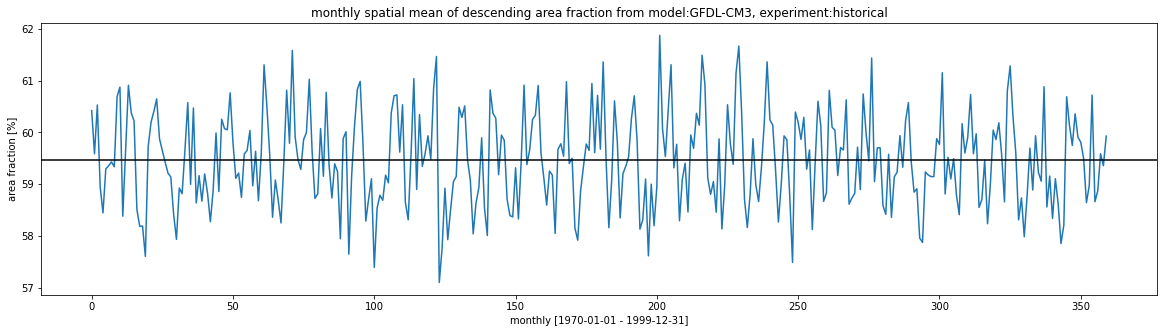

In [68]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

y= wap500_descent_area 
title = '{} spatial mean of {} from model:{}, experiment:{}'.format(timeMean_options[0], 'descending area fraction', datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(wap.isel(time=0).coords['time'].values)[:10], str(wap.isel(time=-1).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('area fraction', '%')


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

### comparing datasets

In [69]:
variable = 'wap'

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no wap data
    'bcc-csm1-1',   # 4 no wao rcp
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 no wap data
    # 'HadGEM2-AO',   # 7 no wap data
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 no wap data
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    # 'inmcm4',       # 13 no wap data
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 no wap data
    ]


observations = [
    ]

datasets = models + observations

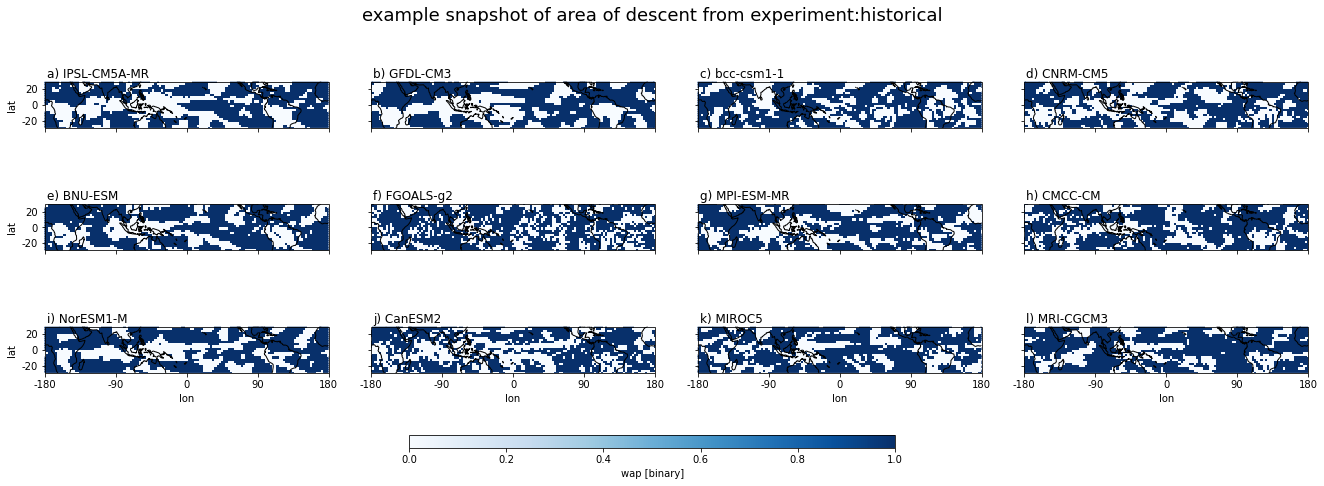

In [70]:
absolute_limits = False
quantile_low = 0
quantile_high = 0.95
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].isel(time=0).sel(plev = 5e4)
        y = data.where(data>0)>0
        
        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'example snapshot of {} from experiment:{}'.format('area of descent', experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.75)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(3,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].isel(time=0).sel(plev = 5e4)
    y = data.where(data>0)>0

    cmap = 'Blues'
    pcm = plot_scene(y, cmap=cmap, zorder=0, ax=ax, vmin=vmin, vmax=vmax)
    
    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.825)

cbar_ax = fig.add_axes([0.425, 0.4, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('wap', 'binary'))

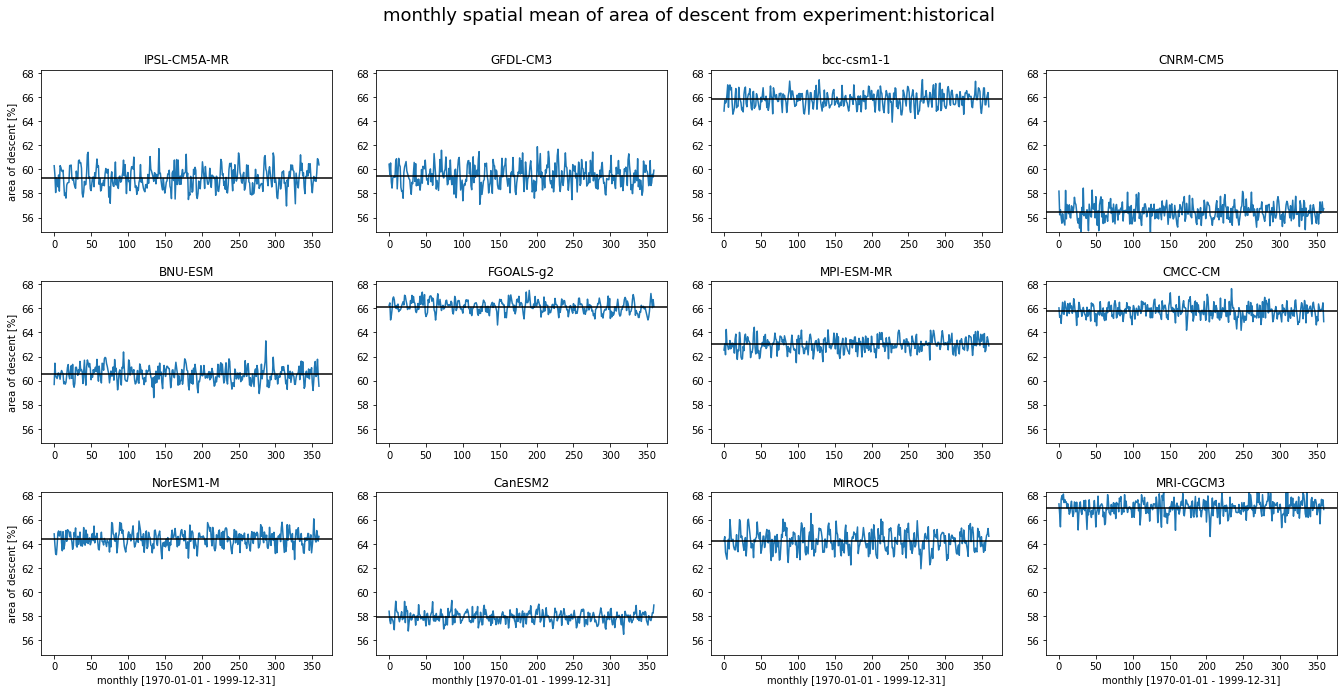

In [71]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

absolute_limits = True
quantile_low = 0
quantile_high = 0.99
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
        lat = data.lat.data
        lon = data.lon.data
        lonm,latm = np.meshgrid(lon,lat)
        dlat = (lat[1]-lat[0])
        dlon = (lon[1]-lon[0])
        R = 6371
        aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    
        mask = data.where(data>0)>0
        y = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

        if timeMean_options[0] == 'annual':
            y = y.resample(time='Y').mean(dim='time', keep_attrs=True)

        if timeMean_options[0] == 'seasonal':
            y = y.resample(time='QS-DEC').mean(dim="time")
            y = to_monthly(y)
            y = y.rename({'month':'season'})
            y = y.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])
            y = y.isel(year=slice(1, None))

        if timeMean_options[0] == 'monthly':
            if len(y)<1000:
                pass
            else:
                y = y.resample(time='M').mean(dim='time', keep_attrs=True)

        if timeMean_options[0] == 'daily':
            y = y

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} spatial mean of {} from experiment:{}'.format(timeMean_options[0], 'area of descent', experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
    lat = data.lat.data
    lon = data.lon.data
    lonm,latm = np.meshgrid(lon,lat)
    dlat = (lat[1]-lat[0])
    dlon = (lon[1]-lon[0])
    R = 6371
    aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    
    mask = data.where(data>0)>0
    y = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

    title = dataset
    plot_timeseries(y, title=title, timeMean_option=timeMean_options, ax=ax, ymin=vmin, ymax=vmax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
        plt.xlabel(xlabel)

        if timeMean_options[0]=='seasonal':
            plt.legend()

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'area of descent [{}]'.format('%')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

Text(0, 0.5, 'area of descent [%]')

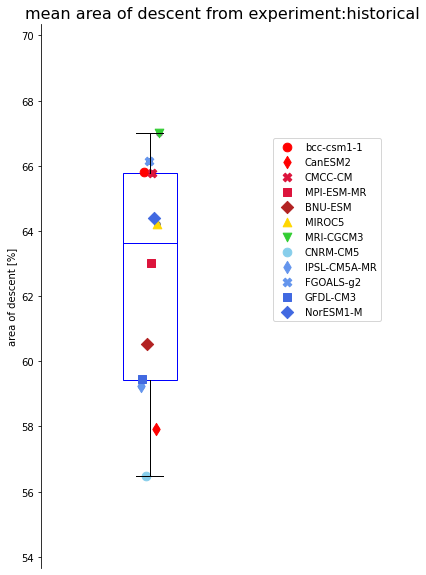

In [72]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no wap data
    'bcc-csm1-1',   # 4 no wao rcp
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 no wap data
    # 'HadGEM2-AO',   # 7 no wap data
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 no wap data
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    # 'inmcm4',       # 13 no wap data
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 no wap data
    ]

colors = [
    'red', 'red', 'crimson', 'crimson', 'firebrick', # red
    'gold', # yellow
    'limegreen', # green
    'skyblue', 'cornflowerblue', 'cornflowerblue','royalblue', 'royalblue' # blue
    ]

markers = ['o','d','X','s','D', '^','v']

order_by_tas = True
if order_by_tas:
    order_list = []
    for dataset in datasets:
        data = get_metric('tas_tMean', dataset, experiment=experiments[0])['tas_tMean']
        aWeights = np.cos(np.deg2rad(data.lat))
        tas = data.weighted(aWeights).mean(dim=('lat','lon'))
        order_list = np.append(order_list, tas)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()

absolute_limits = True
quantile_low = 0
quantile_high = 0.99
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
        lat = data.lat.data
        lon = data.lon.data
        lonm,latm = np.meshgrid(lon,lat)
        dlat = (lat[1]-lat[0])
        dlon = (lon[1]-lon[0])
        R = 6371
        aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    
        mask = data.where(data>0)>0
        y = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
        y = y.mean(dim='time')

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


plt.figure(figsize=(6.5,10))
title = 'mean {} from experiment:{}'.format('area of descent', experiments[0])
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
    lat = data.lat.data
    lon = data.lon.data
    lonm,latm = np.meshgrid(lon,lat)
    dlat = (lat[1]-lat[0])
    dlon = (lon[1]-lon[0])
    R = 6371
    aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    
    mask = data.where(data>0)>0
    data = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
    y_data = data.mean(dim='time')

    y = np.append(y, y_data)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
        
    plt.legend(bbox_to_anchor=(0.95,0.8))


plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('area of descent [{}]'.format('%'))

In [73]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no wap data
    # 'bcc-csm1-1',   # 4 no wao rcp
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 no wap data
    # 'HadGEM2-AO',   # 7 no wap data
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 no wap data
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    # 'inmcm4',       # 13 no wap data
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 no wap data
    ]

observations = [
    ]

datasets = models + observations

Text(0, 0.5, 'area of descent [%]')

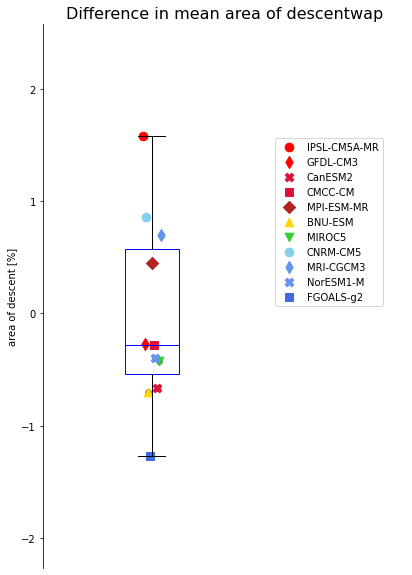

In [74]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no wap data
    # 'bcc-csm1-1',   # 4 no wao rcp
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 no wap data
    # 'HadGEM2-AO',   # 7 no wap data
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 no wap data
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    # 'inmcm4',       # 13 no wap data
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 no wap data
    ]

colors = [
    'red', 'red', 'crimson', 'crimson', 'firebrick', # red
    'gold', # yellow
    'limegreen', # green
    'skyblue', 'cornflowerblue', 'cornflowerblue','royalblue', 'royalblue' # blue
    ]

markers = ['o','d','X','s','D', '^','v']

order_by_tasdiff = True
if order_by_tasdiff:
    order_list = []
    for dataset in datasets:
        tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean']
        aWeights = np.cos(np.deg2rad(tas_historical.lat))

        tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
        tas_rcp = get_metric('tas_tMean', dataset, experiment='rcp85')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
        tasdiff = tas_rcp - tas_historical
        order_list = np.append(order_list, tasdiff)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()


absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiment='historical', resolution=resolutions[0])['wap'].sel(plev = 5e4)
        lat = data.lat.data
        lon = data.lon.data
        lonm,latm = np.meshgrid(lon,lat)
        dlat = (lat[1]-lat[0])
        dlon = (lon[1]-lon[0])
        R = 6371
        aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    
        mask = data.where(data>0)>0
        data = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
        data_historical = data.mean(dim='time')

        data = get_dsvariable(variable, dataset, experiment='rcp85', resolution=resolutions[0])['wap'].sel(plev = 5e4)
        mask = data.where(data>0)>0
        data = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
        data_rcp = data.mean(dim='time')

        tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean']
        aWeights = np.cos(np.deg2rad(tas_historical.lat))
        tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
        tas_rcp = get_metric('tas_tMean', dataset, experiment='rcp85')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
        datadiff = data_rcp - data_historical

        # datadiff = (datadiff/data_historical)*100

        # tasdiff = tas_rcp85 - tas_historical
        # datadiff = datadiff/tasdiff

        y= datadiff

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 



plt.figure(figsize=(6.5,10))
title = 'Difference in mean {}'.format('area of descent' + variable)
plt.xlim(0,1)
plt.ylim(vmin-1, vmax+1)

y= []
for dataset in datasets:

    data = get_dsvariable(variable, dataset, experiment='historical', resolution=resolutions[0])['wap'].sel(plev = 5e4)
    lat = data.lat.data
    lon = data.lon.data
    lonm,latm = np.meshgrid(lon,lat)
    dlat = (lat[1]-lat[0])
    dlon = (lon[1]-lon[0])
    R = 6371
    aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    
    mask = data.where(data>0)>0
    data = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
    data_historical = data.mean(dim='time')

    data = get_dsvariable(variable, dataset, experiment='rcp85', resolution=resolutions[0])['wap'].sel(plev = 5e4)
    mask = data.where(data>0)>0
    data = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
    data_rcp = data.mean(dim='time')

    tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean']
    aWeights = np.cos(np.deg2rad(tas_historical.lat))
    tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
    tas_rcp = get_metric('tas_tMean', dataset, experiment='rcp85')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
    datadiff = data_rcp - data_historical
    
    # datadiff = (datadiff/data_historical)*100

    # tasdiff = tas_rcp85 - tas_historical
    # datadiff = datadiff/tasdiff

    y = np.append(y, datadiff)
    
plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()

    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('area of descent [{}]'.format('%')) # '% K'+ chr(0x207B) + chr(0x00B9) 
# plt.ylim([-4,2])